<h1>PAIRS TRADING RESEARCH</h1>

<h3>1. Run Once </h3> 
install necessary packages.
After that, you need comment the above part of code

In [8]:
# import sys
# !{sys.executable} -m pip install -r ./ requirements.txt

<h3>2. Imports </h3>
get classes of this system

In [1]:
from research import Loader
from research import Cleaner
from research import Correlation
from research import Cointegration
from research import Metrics

import pandas as pd

<h3>3. Settings</h3>
Adjust the settings before run.

In [10]:
is_new_historical_data = True
exchange = 'binance'
timeframe = '1d'
interval = '1 years ago'
min_correlation = 0.51

<h3>4. Historical Data </h3>
Load previous data or Select the desired timeframe and interval for new data

In [11]:
if is_new_historical_data:
    # Get new data and save it #
    raw_df = Loader(exchange).new_historical_data(timeframe=timeframe, interval=interval)
    hist_df = Cleaner().fill_missing_data(raw_df)
    raw_df.to_csv('./data/raw/historical_data.csv', index=True)

else:
    # Retrieve old data #
    hist_df = pd.read_csv('./data/raw/historical_data.csv', header=[0, 1], index_col=0)


hist_df

1INCH/USDT                                    AAVE/USDT         \
                 open    high     low   close     volume      open   high   
time                                                                        
2022-08-24     0.7250  0.7410  0.7080  0.7230  2808555.1     89.50  91.90   
2022-08-25     0.7210  0.7520  0.7210  0.7440  2917799.4     88.50  95.80   
2022-08-26     0.7430  0.7470  0.6550  0.6610  4529157.6     93.20  94.20   
2022-08-27     0.6610  0.6650  0.6440  0.6520  2719879.5     82.70  83.60   
2022-08-28     0.6520  0.6700  0.6300  0.6310  2083741.5     82.10  83.60   
...               ...     ...     ...     ...        ...       ...    ...   
2023-08-19     0.2416  0.2506  0.2405  0.2492  6397243.5     55.85  57.15   
2023-08-20     0.2490  0.2516  0.2456  0.2502  4577216.5     56.58  57.46   
2023-08-21     0.2502  0.2506  0.2368  0.2438  5886622.3     57.13  57.60   
2023-08-22     0.2439  0.2466  0.2337  0.2451  6811290.1     55.55  55.66   
2023-08-23     0.2453  0.2488  0.2435  0.2476  3595938.3     54.93  56.14   

                                      ... ZIL/USDT                             \
              low  close      volume  ...     open     high      low    close   
time                                  ...                                       
2022-08-24  86.80  88.50  114060.905  ...  0.03802  0.04143  0.03688  0.03866   
2022-08-25  87.70  93.20  180095.580  ...  0.03867  0.04137  0.03863  0.03961   
2022-08-26  81.80  82.80  221902.310  ...  0.03960  0.03978  0.03546  0.03594   
2022-08-27  80.40  82.00  129020.116  ...  0.03593  0.03694  0.03548  0.03655   
2022-08-28  78.20  78.60  103340.600  ...  0.03655  0.03694  0.03516  0.03536   
...           ...    ...         ...  ...      ...      ...      ...      ...   
2023-08-19  55.57  56.59   30493.192  ...  0.01669  0.01704  0.01662  0.01702   
2023-08-20  56.23  57.12   27152.023  ...  0.01701  0.01715  0.01687  0.01704   
2023-08-21  55.05  55.55   52414.694  ...  0.01704  0.01705  0.01626  0.01663   
2023-08-22  52.66  54.94   78603.066  ...  0.01664  0.01691  0.01603  0.01669   
2023-08-23  54.83  55.93   34747.535  ...  0.01670  0.01685  0.01654  0.01674   

                        ZRX/USDT                                     
                 volume     open    high     low   close     volume  
time                                                                 
2022-08-24  471761061.7   0.3107  0.3190  0.3019  0.3091  2225282.0  
2022-08-25  295912862.0   0.3088  0.3297  0.3086  0.3211  3513766.0  
2022-08-26  378168527.8   0.3203  0.3224  0.2862  0.2892  4870302.0  
2022-08-27  192450068.9   0.2892  0.2990  0.2846  0.2966  3665736.0  
2022-08-28  141390267.3   0.2966  0.3021  0.2902  0.2913  3687251.0  
...                 ...      ...     ...     ...     ...        ...  
2023-08-19   62290663.2   0.1739  0.1816  0.1733  0.1775  4675607.0  
2023-08-20   48217332.2   0.1776  0.1802  0.1762  0.1790  2462911.0  
2023-08-21   70842162.0   0.1787  0.1792  0.1706  0.1742  3583680.0  
2023-08-22  103025648.6   0.1742  0.1746  0.1657  0.1734  2763271.0  
2023-08-23   33614713.9   0.1735  0.1753  0.1709  0.1739  2119363.0  

[365 rows x 980 columns]

<h3>4. Cleaning Data </h3> 

In [12]:
cleaned_df = Cleaner().get_cleaned_data(hist_df)
cleaned_df

,1INCH/USDT,AAVE/USDT,ACH/USDT,ADA/USDT,AGLD/USDT,ALGO/USDT,ALICE/USDT,ALPHA/USDT,ANKR/USDT,ANT/USDT,...,XRP/USDT,XTZ/USDT,XVG/USDT,XVS/USDT,YFI/USDT,YGG/USDT,ZEC/USDT,ZEN/USDT,ZIL/USDT,ZRX/USDT
time,,,,,,,,,,,,,,,,,,,,,
2022-08-24,0.7230,88.50,0.01433,0.4578,0.373,0.3022,2.266,0.1312,0.04020,1.680,...,0.3456,1.600,0.003210,5.72,9343.0,0.5763,67.60,17.00,0.03866,0.3091
2022-08-25,0.7440,93.20,0.01447,0.4645,0.375,0.3071,2.289,0.1340,0.04099,1.755,...,0.3491,1.669,0.003280,5.69,9797.0,0.5801,67.80,17.17,0.03961,0.3211
2022-08-26,0.6610,82.80,0.01331,0.4316,0.340,0.2828,2.045,0.1194,0.03704,1.535,...,0.3393,1.483,0.003030,5.13,8986.0,0.5161,61.10,15.51,0.03594,0.2892
2022-08-27,0.6520,82.00,0.01317,0.4499,0.347,0.2888,2.018,0.1193,0.03595,1.589,...,0.3346,1.462,0.002920,4.87,8773.0,0.5139,61.40,15.20,0.03655,0.2966
2022-08-28,0.6310,78.60,0.01298,0.4293,0.326,0.2824,1.946,0.1147,0.03558,1.513,...,0.3224,1.427,0.002890,4.82,8466.0,0.4796,61.20,14.87,0.03536,0.2913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19,0.2492,56.59,0.01520,0.2688,0.506,0.0967,0.760,0.0839,0.02020,4.451,...,0.5199,0.710,0.003573,3.83,5653.0,0.2485,24.90,7.28,0.01702,0.1775
2023-08-20,0.2502,57.12,0.01500,0.2703,0.512,0.0972,0.768,0.0835,0.02034,4.366,...,0.5384,0.711,0.003544,3.79,5694.0,0.2347,25.13,7.20,0.01704,0.1790
2023-08-21,0.2438,55.55,0.01413,0.2628,0.501,0.0963,0.762,0.0827,0.01975,4.268,...,0.5245,0.698,0.003350,3.74,5572.0,0.2260,24.85,7.14,0.01663,0.1742


<h3>5. Correlated Currencies </h3>
Describe the minimum correlation rate that you expect

In [13]:
corr_df = Correlation(cleaned_df).get_log_correlation(min_correlation=min_correlation)
corr_df

,currency1,currency2,correlation
0,1INCH/USDT,AAVE/USDT,0.661248
1,1INCH/USDT,ADA/USDT,0.640328
2,1INCH/USDT,ALGO/USDT,0.713621
3,1INCH/USDT,ALICE/USDT,0.730753
4,1INCH/USDT,ALPHA/USDT,0.600843
...,...,...,...
10189,ZEC/USDT,ZIL/USDT,0.763753
10190,ZEC/USDT,ZRX/USDT,0.760038
10191,ZEN/USDT,ZIL/USDT,0.770046
10192,ZEN/USDT,ZRX/USDT,0.756065


<h3>6. Cointegrated Currencies </h3>

In [14]:
coint_df = Cointegration(cleaned_df).filter_by_cointegration(corr_df).get_results()

<h3>7. Apply Metrics </h3>

In [15]:
output_df = Metrics(cleaned_df).apply_metrics(coint_df).filter_by_crossings().get_results()
output_df.to_csv('./data/outputs/researcher.csv', index=True)
output_df

,currency1,currency2,correlation,ratio,zero_crossings
1896,ATOM/USDT,IOTX/USDT,0.713254,454.294098,63
3892,CHR/USDT,ICP/USDT,0.722438,0.028433,62
5819,ENJ/USDT,ZIL/USDT,0.825893,14.438915,59
6264,FIL/USDT,KLAY/USDT,0.610255,24.940418,55
9085,OGN/USDT,ZEN/USDT,0.715307,0.010940,54
...,...,...,...,...,...
9996,THETA/USDT,TRB/USDT,0.668050,0.064031,32
5209,DGB/USDT,NMR/USDT,0.541077,0.000572,32
8014,KLAY/USDT,ROSE/USDT,0.555423,3.614385,32
9489,REN/USDT,STORJ/USDT,0.592245,0.246849,32


<h3>8. Visualization</h3>

In [16]:
import matplotlib.pyplot as plt
import numpy as np

<h4>8.1. Correlation of pairs over the time</h4>

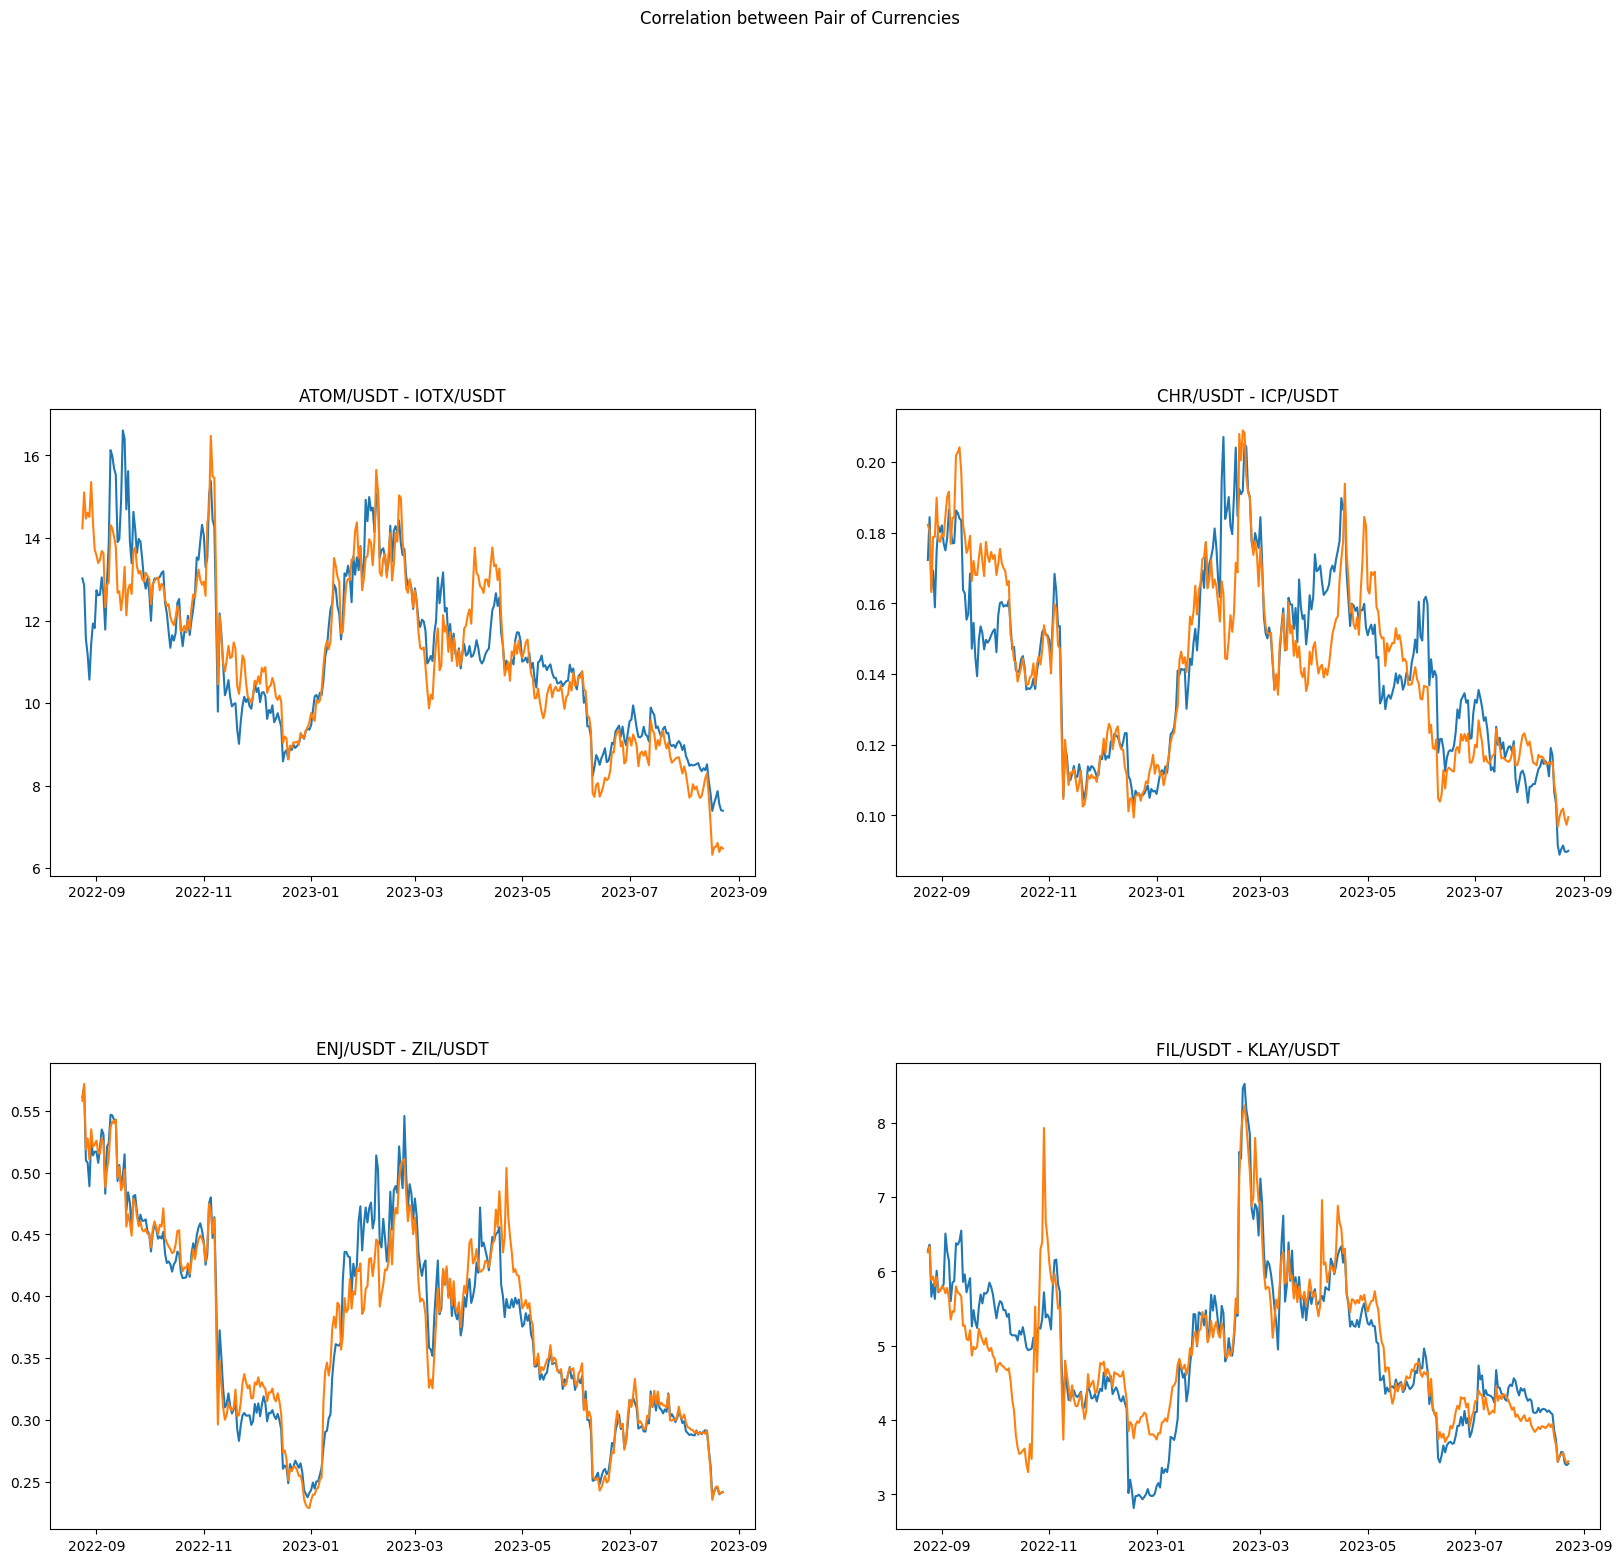

In [17]:
# Create a figure frame #
fig = plt.figure(figsize=(20, 40))
fig.subplots_adjust(hspace=0.4)

# Add a title to the figure #
fig.suptitle('Correlation between Pair of Currencies')
for i in range(0, 4):

    # Get the closing price of researched currency1 #
    x=cleaned_df[output_df.iloc[i]['currency1']]
    y=cleaned_df[output_df.iloc[i]['currency2']] * output_df.iloc[i]['ratio']

    ax = fig.add_subplot(5 ,2, i+1)
    ax.plot(cleaned_df.index, x)
    ax.plot(cleaned_df.index, y)
    ax.set_title(output_df.iloc[i]['currency1'] + ' - ' + output_df.iloc[i]['currency2'])

<h4>8.2. Cointegration of Pairs</h4>

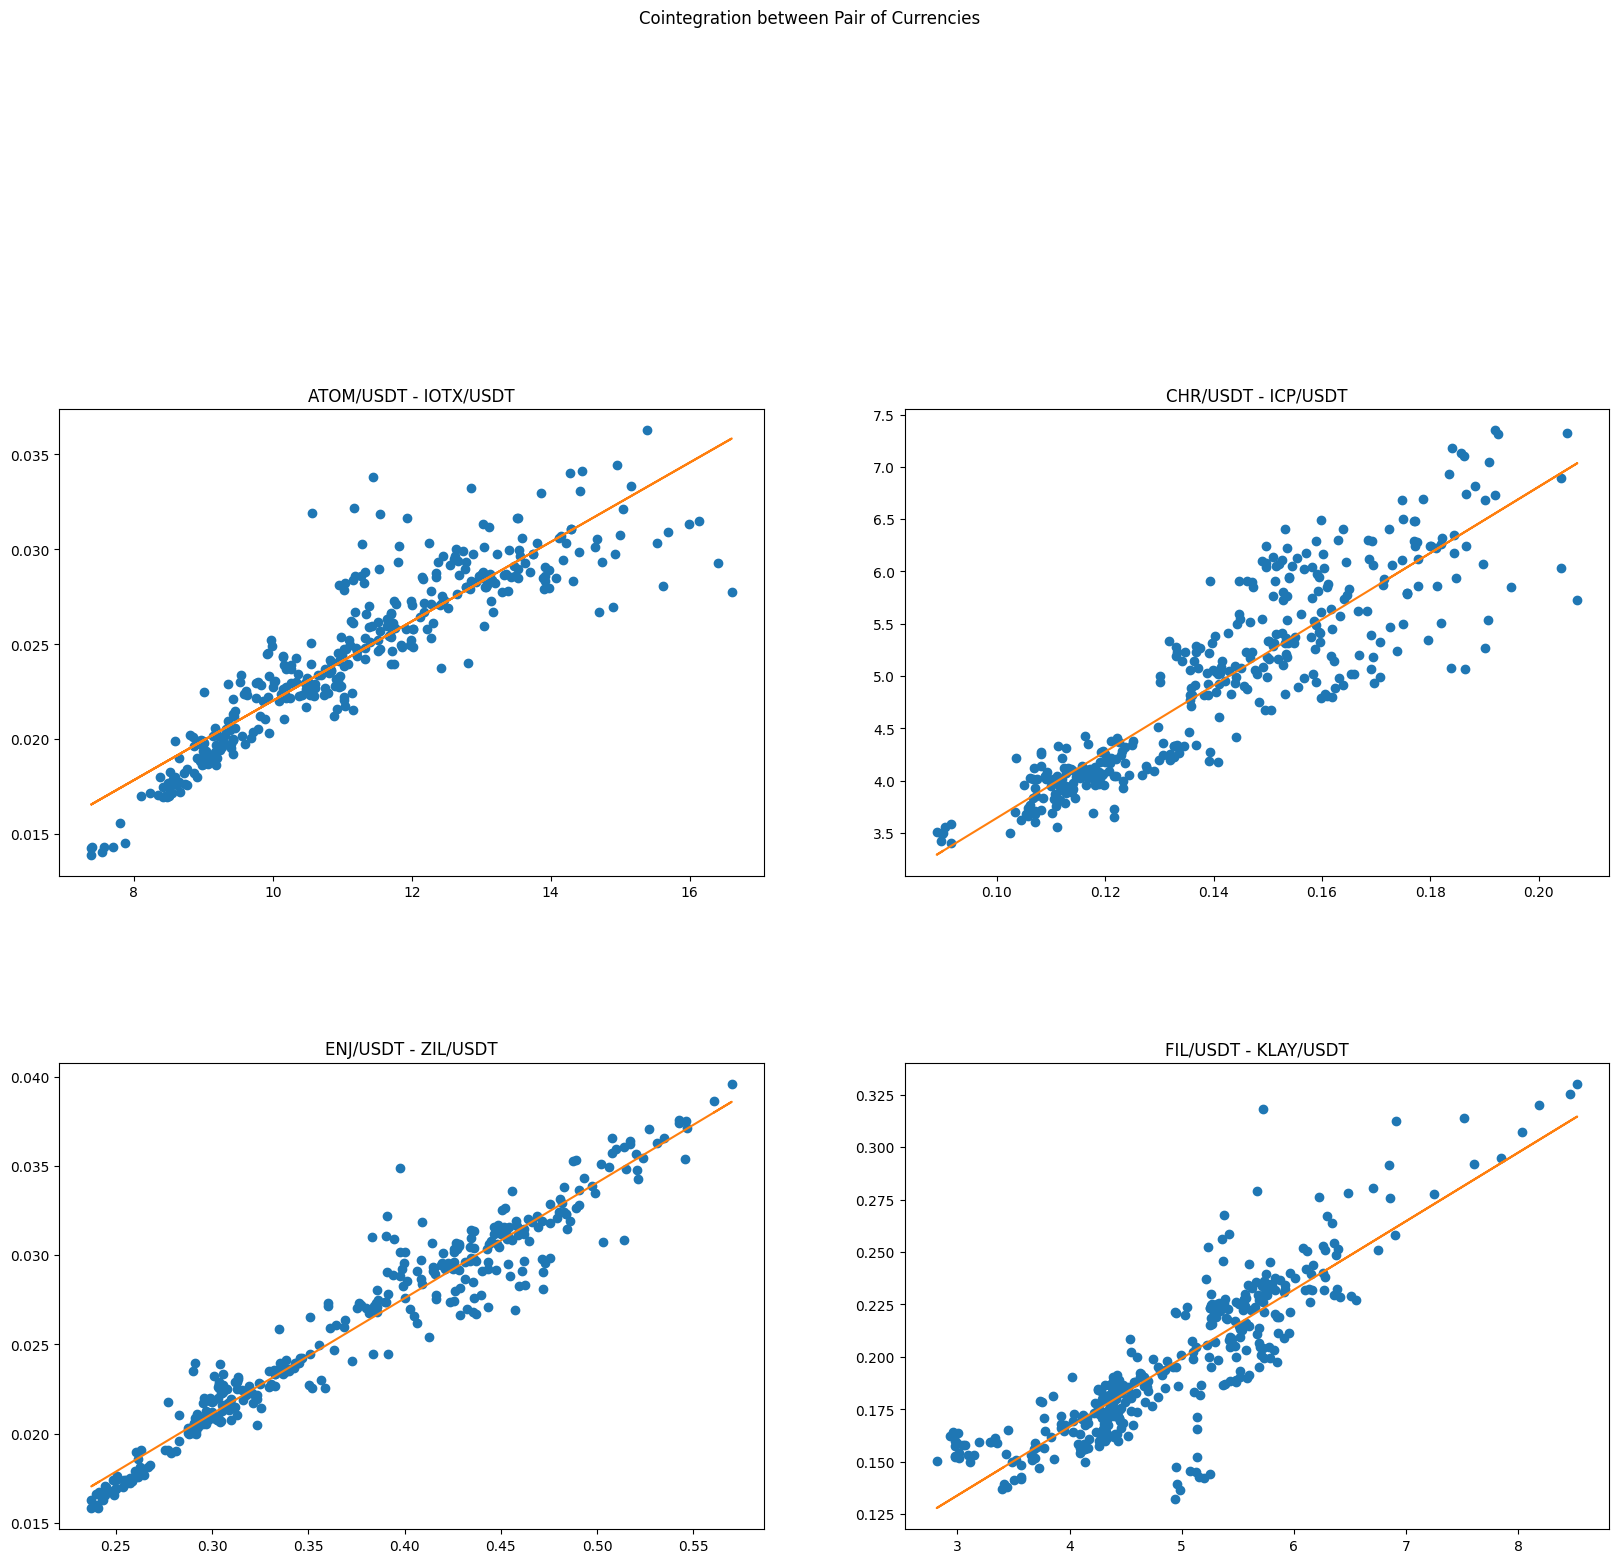

In [18]:
fig = plt.figure(figsize=(20, 40))
fig.subplots_adjust(hspace=0.4)

# Add a title to the figure
fig.suptitle('Cointegration between Pair of Currencies')

for i in range(0 , 4):

    # Get the closing price of researched currency1 #
    x=cleaned_df[output_df.iloc[i]['currency1']]

    # Get the closing price of researched currency2 #
    y=cleaned_df[output_df.iloc[i]['currency2']]

    ax = fig.add_subplot(5, 2, i+1)
    ax.plot(x, y, 'o')

    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x+b)

    ax.set_title(output_df.iloc[i]['currency1'] + ' - ' + output_df.iloc[i]['currency2'])